In [2]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('dava.csv')
data

,Unnamed: 0,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity,Outcome
0,0,132,8,35206,49,2,0
1,1,300,12,46106,46,2,1
2,2,136,2,16411,31,1,1
3,3,101,1,7911,35,1,0
4,4,218,16,6734,33,1,0
...,...,...,...,...,...,...,...
95,95,260,16,48525,12,1,1
96,96,70,3,37635,1,1,1
97,97,57,4,38828,1,1,0
98,98,164,19,23711,47,2,1


## Veri Seti inceleme
Veri Seti Özellikleri:  
Case Duration (Gün): Davanın tamamlanması için geçen süre (gün cinsinden).  
Number of Witnesses (Tanık Sayısı): Dava boyunca dinlenen tanık sayısı.  
Legal Fees (Hukuk Maliyetleri): Dava süresince oluşan toplam hukuk maliyetleri (USD cinsinden).  
Number of Evidence Items (Delil Sayısı): Davada kullanılan delil sayısı.  
Severity (Ciddiyet Düzeyi): Davanın ciddiyet düzeyi (1: Düşük, 2: Orta, 3: Yüksek).  
Outcome (Sonuç): Davanın sonucu (0: Aleyhte, 1: Lehinde).  

## GÖREV:
Özellik Seçimi: Hangi özelliklerin kümeleme için kullanılacağına karar verin.  
Küme Sayısını Belirleme: Elbow yöntemi gibi tekniklerle optimal küme sayısını belirleyin.  
Kümeleme İşlemi: K-Means algoritmasını kullanarak verileri kümeleyin.  
Sonuçları Görselleştirme: Kümeleme sonuçlarını uygun grafiklerle görselleştirin ve yorumlayın.  

Unnamed: 0                  0
Case Duration (Days)        0
Number of Witnesses         0
Legal Fees (USD)            0
Number of Evidence Items    0
Severity                    0
Outcome                     0
Cluster                     0
dtype: int64


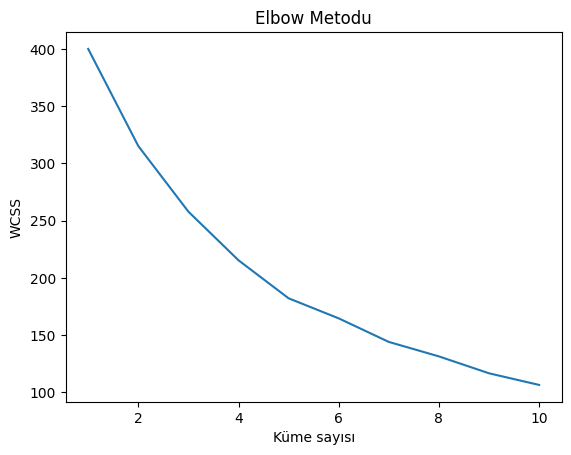

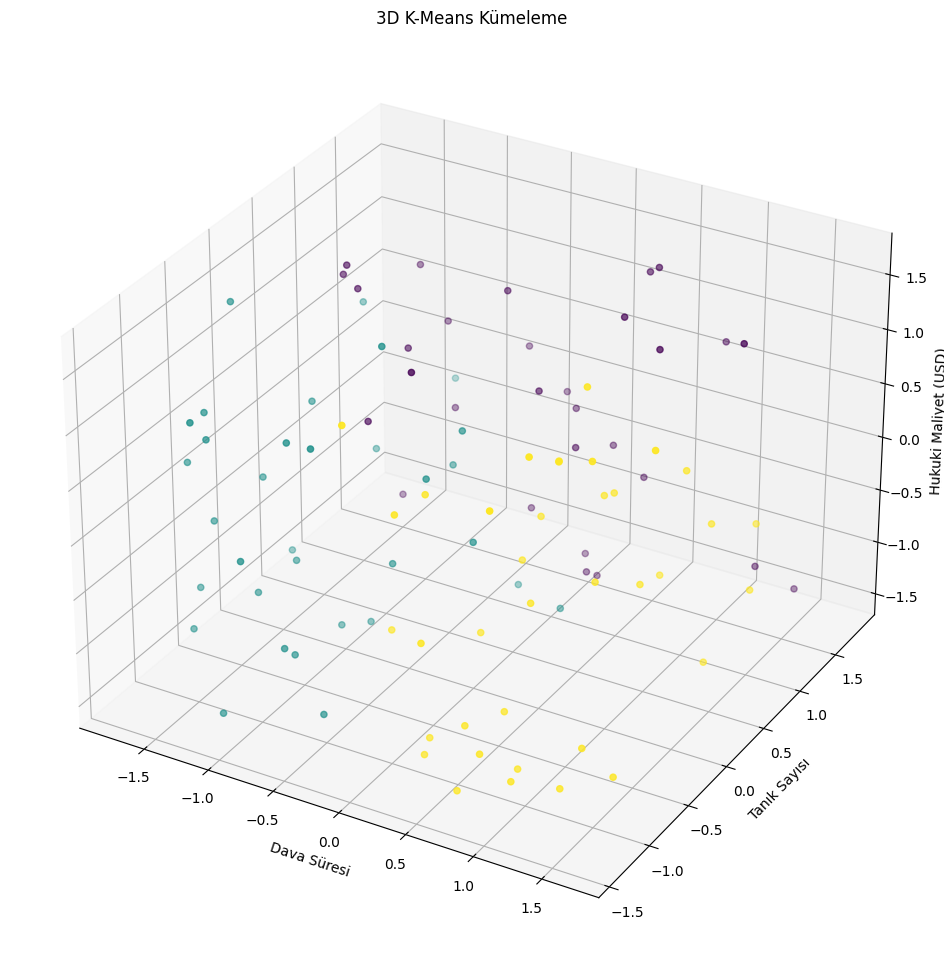

In [7]:
# Kodu buraya yazınız.
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

print(data.isnull().sum())

# Kullanılacak özelliklerin seçimi
selected_features = data[['Case Duration (Days)', 'Number of Witnesses', 'Legal Fees (USD)', 'Number of Evidence Items']]

# Verilerin ölçeklenmesi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Elbow yöntemi
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Grafiğin çizilmesi
plt.plot(range(1, 11), wcss)
plt.title('Elbow Metodu')
plt.xlabel('Küme sayısı')
plt.ylabel('WCSS')
plt.show()

# Optimal küme sayısı
optimal_clusters = 3

# K-Means modeli
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

data['Cluster'] = clusters

# 3D görselleştirme
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], c=clusters, cmap='viridis')

ax.set_xlabel('Dava Süresi')
ax.set_ylabel('Tanık Sayısı')
ax.set_zlabel('Hukuki Maliyet (USD)')
plt.title('3D K-Means Kümeleme')
plt.show()